**Title**: DAT 301 Project 2

**Author**: Khushi Patel, Anish Kolan, Matthew Luo

**Date**: April 27th, 2024

# **INTRODUCTION**

### **Import Statements**

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

## **Context**
This data is derived from an experiment conducted that examines the effects of anti-anxiety medicine. The participants were over 25 years of age and consisted of both genders. Participants first completed a memory test before drug exposure. In addition, happy or sad memories were primed for 10 minutes prior to testing. 

There are three types of drugs: **Alprazolam**, **Triazolam**, **Sugar Tablet (Placebo)**. 

There are also three different levels of dosages that were administered. 

**Participants were tested every day for 1 week.**

At the end of the experiment, once "addiction" was acheived, the participants completed a memory test once again and the data was documented.

## **Data**
In this dataset, there are 8 variable columns:

  - **first_name**: a categorical value with first name of subject
  - **last_name**: a categorical value with last name of subject
  - **age**: a quantitative value that refers to subject's age
  - **Happy_Sad_group**: a categorical value (H: Happy, S: Sad) that refers to the type of memory exposed to the subject 10 minutes before testing
  - **Dosage**: a categorical value with values 1 - 3 (1 is low, 2 is medium, 3 is over recommended daily intake)
  - **Drug**: a categorical value with values A (Alprazolam), T (Triazolam), S (Sugar Tablet)
  - **Mem_Score_Before**: quantitative value that indicates how long it took to finish a memory test prior to drug exposure
  - **Mem_Score_After**: quantitative value that indicates how long it took to finish a memory test after 1 week of drug use

There is 1 output column:

  - **Diff**: quantitative value that is the difference between memory score before and after



# **PROBLEM DEFINITION**

##### Does the type and dosage of anti-anxiety medicine have a noticeable effect on memory recall? Do other factors such as emotional priming with happy or sad memories and age also play a role? 


### **IMPORT DATA**

In [52]:
raw_df = pd.read_csv("Islander_data.csv")

### **CLEAN DATA**

In [53]:
na_rows = raw_df.isna().sum().sum()  # Total count of NA values
print("Number of NA rows:", na_rows)

df = raw_df.drop(columns=['first_name', 'last_name'])

print(df.head())

Number of NA rows: 0
   age Happy_Sad_group  Dosage Drug  Mem_Score_Before  Mem_Score_After  Diff
0   25               H       1    A              63.5             61.2  -2.3
1   52               S       1    A              41.6             40.7  -0.9
2   29               H       1    A              59.7             55.1  -4.6
3   50               S       1    A              51.7             51.2  -0.5
4   52               H       1    A              47.0             47.1   0.1


# **EXPLORATORY DATA ANALYSIS**

## **Average Difference in Memory Performance for Drug Types**

##### We first view the data in a barplot where we compare the difference of memory recall length with each Type of drug (Alprazolam, Triazolam, and Sugar Tablets (Placebo)).
##### - Using the information we have, we subset the data into only having the Drug and Diff columns for easier access when calculating and visualizing the data.


In [54]:
# Subset the data for drugs A, T, and S
drug_subset = df[df['Drug'].isin(['A', 'T', 'S'])][['Drug', 'Diff']]

# Display the first 5 rows
print(drug_subset.head())

  Drug  Diff
0    A  -2.3
1    A  -0.9
2    A  -4.6
3    A  -0.5
4    A   0.1


##### After subsetting the data, we look to find the mean Diff values for each drug type.

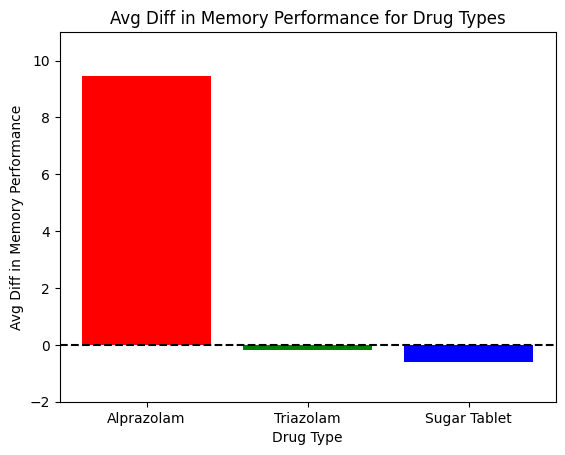

Drug
A    9.47
S   -0.17
T   -0.59
Name: Diff, dtype: float64


In [55]:
# Mean diff for each drug type
mean_diff = drug_subset.groupby('Drug')['Diff'].mean()


# Create barplot
plt.bar(mean_diff.index, mean_diff.values, color=['red', 'green', 'blue'])
plt.title("Avg Diff in Memory Performance for Drug Types")
plt.xlabel("Drug Type")
plt.ylabel("Avg Diff in Memory Performance")
plt.axhline(y=0, color='black', linestyle='--')  
plt.ylim(-2, 11)
plt.xticks(mean_diff.index, ["Alprazolam", "Triazolam", "Sugar Tablet"])
plt.show()


mean_diff_val = mean_diff.round(2)
print(mean_diff_val)

##### After visualizing the data, we conclude that the drug Alprazolam has a significant effect on the memory retention for patients. 
##### As the mean difference for memory length is much higher with Alprazolam versus Triazolam and Sugar Tablets, it is understood that patients usually take a longer time to finish the memory test when they take the Alprazolam drug.


## **Average Difference in Memory Performance for Each Alprazolam Dosage**

##### Based on the previous information, we will observe the data between different dosages of the drug Alprazolam and the mean difference for memory length.

##### Using specifically the Drug "A" which represents Alprazolam, we select the different Dosage levels (1: Low, 2: Medium, 3: Over recommended daily amount). Using these dosage levels, we find the mean difference for memory length within this specific drug.

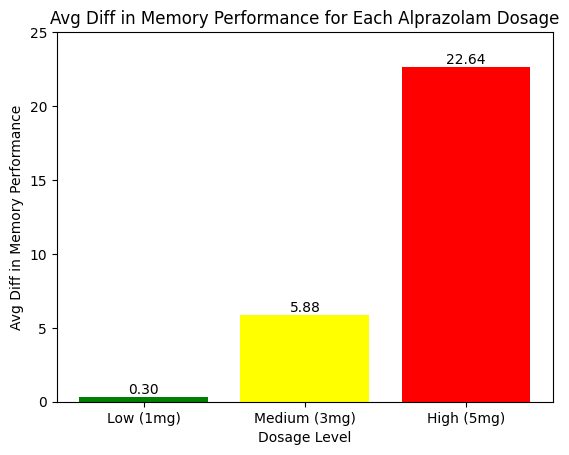

In [56]:
# Filter data for Alprazolam
alprazolam_data = df[df['Drug'] == 'A']


# Calculate mean difference for each dosage
avg_diff = [alprazolam_data[alprazolam_data['Dosage'] == i]['Diff'].mean() for i in range(1, 4)]


# Create bar plot
dosage_levels = ["Low (1mg)", "Medium (3mg)", "High (5mg)"]
colors = ['green', 'yellow', 'red']


bars = plt.bar(dosage_levels, avg_diff, color=colors)
plt.title("Avg Diff in Memory Performance for Each Alprazolam Dosage")
plt.xlabel("Dosage Level")
plt.ylabel("Avg Diff in Memory Performance")
plt.ylim(0, 25)


plt.bar_label(bars, fmt='%.2f') # go to two decimal places


plt.show()

##### Based on the data visualized from the barplot, we can conclude that high dosage levels within this Alprazolam Drug significantly effects the subject's memory retention. 
- ##### The high dosage level has a mean difference in memory performance value of about 22.64 seconds where the medium dosage level has an average difference time of 5.88 seconds, and the low dosage level has an average difference time of 0.3 seconds. 
- ##### Therefore, the higher levels indicate poorer memory performance from the subjects.

## **Histogram of Age**

##### First, to understand the distribution of age, we can make a histogram.


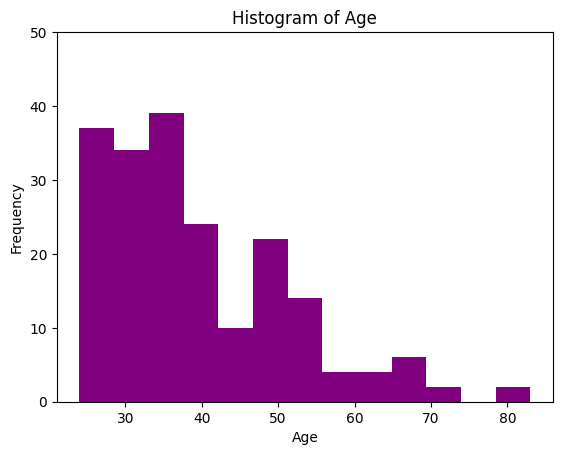

In [57]:
# Extract age and Diff columns
Age = df['age']
Diff = df['Diff']


# Plot histogram for Age column
plt.hist(Age, color='purple', bins=13)


plt.ylim(0, 50)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

##### There appears to be a prominent concentration of younger individuals in this experiment. There is less frequency as the age decreases. 
#### Let's now take a closer look at the distribution of the data by performing a ***Shapiro-Wilk statistical test*** which tests for normality

## **Shapiro-Wilk Statistical Test**

In [58]:
from scipy.stats import shapiro
statistic, p_value = shapiro(Age)

print("p_value: " , p_value)

p_value:  1.1245458258710285e-09


##### Given significance level (alpha) of 0.05, the p-value of 1.12E-9 is less than alpha. 
- ##### Thus, we ***reject*** the null hypothesis. 
##### For the Shapiro-Wilk test, the null hypothesis is that the data is normally distributed. 
- ##### Thus, we have enough evidence to conclude that the age of the subjects is **not** normally distributed. 


## **Avg Diff of Memory Performance vs Age**

##### Let’s create a scatterplot to visualize the relationship between age and diff. We can also represent each drug as a different color. Alprazolam is red, Triazolam is green, Sugar Tablet is blue below.

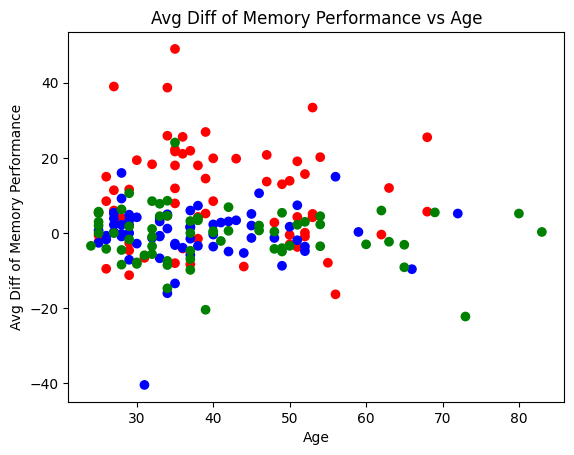

Correlation coefficient between Age and Diff: -0.009293328126756118


In [59]:
# Create a dictionary of colors based on the Drug variable
drug_colors = {'A': 'red', 'T': 'green', 'S': 'blue'}


# Plot the points with colors based on Drug
plt.scatter(df['age'], df['Diff'], c=df['Drug'].map(drug_colors), marker='o')
plt.xlabel('Age')
plt.ylabel('Avg Diff of Memory Performance')
plt.title('Avg Diff of Memory Performance vs Age')
plt.show()


#Next, lets check the correlation between age and the diff
correlation = Age.corr(Diff)


print("Correlation coefficient between Age and Diff:", correlation)

##### Visually, there does not appear to be a correlation between the age and the diff. We can check this using the correlation function. 
- ##### This value suggests a very weak negative correlation between the diff and age.

## **Memory Performance Prior Drug Usage vs Age**

##### We also want to also understand if there is a correlation between age and the initial memory test prior to the drug usage.

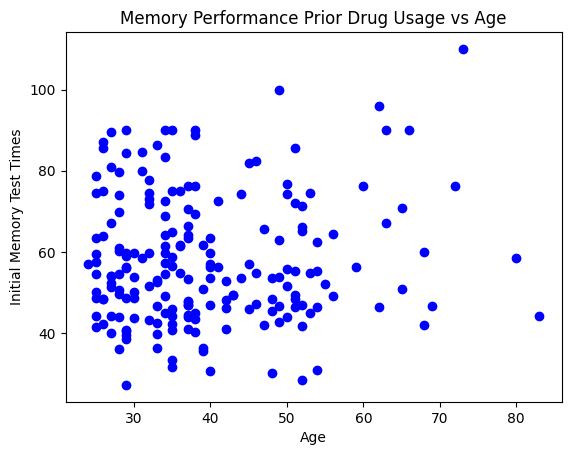

In [60]:
# Extracting data from DataFrame
Age = df['age']
InitMemTest = df['Mem_Score_Before']


# Create Graph
plt.scatter(Age, InitMemTest, marker='o', color='blue')


#Labels and Title
plt.title("Memory Performance Prior Drug Usage vs Age")
plt.xlabel("Age")
plt.ylabel("Initial Memory Test Times")


plt.show()

##### After viewing the scatterplot graph, we couldn't observe any sort of correlation between age and the initial memory test score, so we used the correlation function to get a more specific value.


In [61]:
# Correlation value
correlation = df['age'].corr(df['Mem_Score_Before'])

print("Correlation coefficient between Age and I:", correlation)

Correlation coefficient between Age and I: 0.06601026701966042


##### The value presented here is close to zero which presents a very weak positive correlation between age and the initial memory test prior to the drug usage.

##### Overall, we can note that age is not at all a prominent or useful feature when it comes to the difference in performance of memory.


## **Average Difference in Memory Performance for Each Priming Block**

##### As mentioned earlier, research shows that sad memories invokes better memory recall whereas, happy memories are more susceptible to false memories. 
- ##### With this prior information, **we hypothesize that people placed in the happy priming group might have higher diff values than people who were placed in sad priming groups.


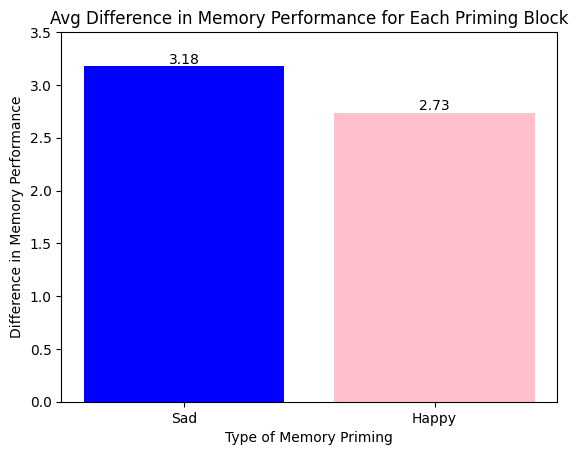

In [62]:
# Find the average diff values of each type of emotion priming
avg_diff = [df[df['Happy_Sad_group'] == group]['Diff'].mean() for group in ['S', 'H']]


# Create bar plot
priming_types = ["Sad", "Happy"]
colors = ['blue', 'pink']


bars = plt.bar(priming_types, avg_diff, color=colors)
plt.title("Avg Difference in Memory Performance for Each Priming Block")
plt.xlabel("Type of Memory Priming")
plt.ylabel("Difference in Memory Performance")
plt.ylim(0, 3.5)
plt.bar_label(bars, fmt='%.2f') # Round to two decimal places


plt.show()

##### We can see that there is a slight difference between sad and happy memory priming. Priming with sad memories results in a slightly greater difference in performance. 
- ##### This means that priming with sad memories results in slightly worse memory. 
- ##### However, the difference is small and given the small samples size this difference may not be statistically significant, but this does reveal that the results were not entirely consistent with our hypothsis for this plot. 


## **T-Test for Happy and Sad Groups**

In [63]:
# Perform two-sample t-test
sad_group = df[df['Happy_Sad_group'] == 'S']['Diff']
happy_group = df[df['Happy_Sad_group'] == 'H']['Diff']


t_stat, p_value = stats.ttest_ind(sad_group, happy_group)


print("p-value:", p_value)

p-value: 0.7730715353432922


##### Given significance level (alpha) of 0.05, the p-value is greater than alpha. 
- ##### Thus, we fail to reject the null hypothesis. 
- ##### There is not enough evidence to conclude that there is a statistically significant difference in memory performance between the sad and happy priming groups given alpha = 0.05


## **Average Difference in Memory Performance for Sad/Happy Priming in Drug A**

##### Since we know Drug A shows the worst memory performance, let's examine whether experiencing sad and happy memory priming while taking this specific drug shows any differences. 
- ##### After calculating the means difference of memory performance based on Sad and Happy priming, we displayed the information on a barplot.


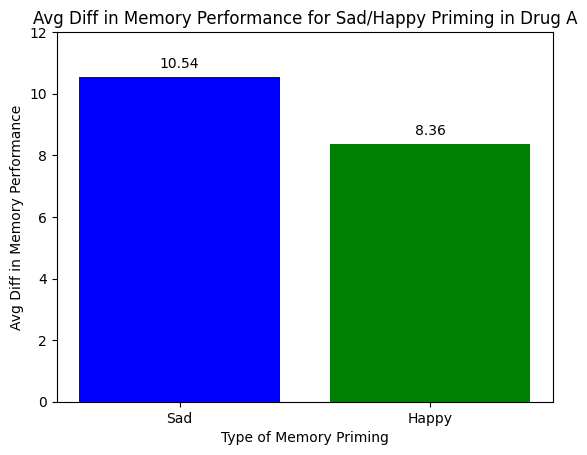

In [64]:
# Subset the data for drug A
drug_A_subset = df[df['Drug'] == 'A']


# Calculate average difference for sad and happy priming in Drug A
avg_diff_drug_A = {
   'Sad': drug_A_subset[drug_A_subset['Happy_Sad_group'] == 'S']['Diff'].mean(),
   'Happy': drug_A_subset[drug_A_subset['Happy_Sad_group'] == 'H']['Diff'].mean()
}


# Plot bar plot
plt.bar(avg_diff_drug_A.keys(), avg_diff_drug_A.values(), color=['blue', 'green'])
plt.title("Avg Diff in Memory Performance for Sad/Happy Priming in Drug A")
plt.xlabel("Type of Memory Priming")
plt.ylabel("Avg Diff in Memory Performance")


# Add values on top of bars
for key, value in avg_diff_drug_A.items():
   plt.text(key, value + 0.2, round(value, 2), ha='center', va='bottom')


plt.ylim(0, 12)
plt.show()

##### We anticipated a larger change between Sad and Happy priming since the drug Alprazolam has larger effects on the subjects. 
- ##### After viewing the barplot, we conclude that the sad memory priming during the experiment yielded slightly poorer memory performance. 
- ##### This had no difference when we tested for the sad/happy priming changes with all drugs.


## **T-Test for Happy and Sad Groups within Drug Alprazolam**

In [65]:
# Subset the data for drug A
alprazolam_data = df[df['Drug'] == 'A']


# Perform two-sample t-test
sad_group = alprazolam_data[alprazolam_data['Happy_Sad_group'] == 'S']['Diff']
happy_group = alprazolam_data[alprazolam_data['Happy_Sad_group'] == 'H']['Diff']


t_stat, p_value = stats.ttest_ind(sad_group, happy_group)


print("p-value:", p_value)

p-value: 0.504964382218464


##### Given significance level (alpha) of 0.05, the p-value of 0.50 is greater than alpha. Thus, we fail to reject the null hypothesis. 
- ##### There is not enough evidence to conclude that there is a statistically significant difference in memory performance between the sad and happy priming groups given alpha = 0.05


# **CONCLUSION**

##### In this project, we explored the relationship between anti-anxiety medication, memory priming, and memory retention. 
- ##### Our analysis showed that Alprazolam is the most influential drug, causing a significant impact on memory retention compared to Triazolam or the placebo. 
- ##### In addition, within the Alprazolam group, higher dosage levels correlated with more substantial declines in memory performance, suggesting a dose-dependent effect. 
- ##### When looking at other factors, we found no significant correlation between age and memory retention. 
- ##### Memory priming, on the other hand, yielded some interesting results. Contrary to our initial hypothesis, individuals primed with sad memories showed slightly worse memory performance compared to those primed with happy memories. 
##### In summary, using various data analysis techniques we gained insight into the interesting relationship between anti-anxiety medication, memory priming, and memory retention. 